<a href="https://colab.research.google.com/github/jasinwi22034/ML_HotelBookingPrediction/blob/main/DataExplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einleitung

In der heutigen dynamischen Hotelbranche kann die Fähigkeit, Buchungsstornierungen vorherzusagen, von entscheidender Bedeutung für den Erfolg eines Hotels sein. Durch die Analyse von Buchungsdaten und die Anwendung von Vorhersagemodellen können Hotels wichtige Einblicke gewinnen, um Ressourcen effizient zu planen und die Kundenzufriedenheit zu steigern. In diesem Data Exploration Project wird untersucht, wie verschiedene Merkmale von Hotelbuchungen genutzt werden können, um Stornierungen vorherzusagen, und erste Ideen und Ansätze für eine Anwendung in der Hotelbranche diskutiert.

# Beschreibung des Datensatzes

Der vorliegende Datensatz umfasst 36.285 individuelle Datensätze von Hotelbuchungen aus den Jahren 2015 bis 2018. Diese Daten wurden direkt aus realen Hotelbuchungen erhoben, um sicherzustellen, dass die daraus abgeleiteten Vorhersagemodelle authentisch und glaubwürdig sind. Der Datensatz ist vielfältig und enthält eine breite Palette von Merkmalen, darunter Buchungsdetails, Kundeninformationen, Reservierungsspezifikationen und den Status, ob die Reservierung storniert wurde oder nicht.

Zu den Hauptmerkmalen des Datensatzes gehören:

Buchungsdetails: Dies umfasst Informationen wie Anzahl der Übernachtungen (number of week nights, number of weekend nights), Zimmerpreis (average price), Anzahl der Erwachsenen und Kinder (number of adults, number of children) usw.

Kundeninformationen: Hier sind Daten wie Anzahl der vorherigen nicht-stornierten und stornierten Buchungen des Kunden enthalten.

Reservierungsspezifikationen: Dazu gehören Daten wie Art des Zimmers (room type), Verpflegungsoptionen (type of meal), Buchungskanal (Offline/Online), Parkplatzreservierung (car parking space) und Anzahl an Sonderwünschen (special requests).

Buchungsstatus: Diese Spalte gibt an, ob die Buchung storniert wurde oder nicht. Sie dient als Zielvariable für mögliche Vorhersagemodelle.

Der Datensatz wurde am 16.02.2024 von Kaggle heruntergeladen und kann unter folgendem Link gefunden werden: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction.

Dieser Datensatz wurde aufgrund seiner Relevanz und seiner potenziellen Auswirkungen auf verschiedene Bereiche ausgewählt. Hotelbuchungen sind ein wichtiger Bestandteil des Hotelmanagements, und die Fähigkeit, Buchungsstornierungen vorherzusagen, kann Hotelmanagern dabei helfen, ihre Ressourcen effizient zu verwalten und ihren Umsatz zu maximieren. Darüber hinaus bietet dieser Datensatz eine breite Palette von Merkmalen, die verschiedene Analyse- und Modellierungstechniken ermöglichen, was ihn ideal für ein Data Exploration Project macht.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# URL zur CSV-Datei
url = 'https://gitlab.com/dataexploration/hotelbookingprediction/-/raw/main/booking.csv'

# Laden der CSV
bookings = pd.read_csv(url)
bookings.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#file_url = 'https://drive.google.com/uc?id=1weEFijrZpyZvaawiwTtAFJvNHhW1Cp3y'
# Load data into DataFrame
#bookings = pd.read_csv(file_url)
#bookings.head()




# Analyse der Datenqualität

In [ ]:
# Data Cleaning

# Make index start from 1 instead of 0 & drop the old index
bookings.drop(["Booking_ID"], axis=1, inplace=True)
bookings.index = bookings.index + 1

bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [ ]:
bookings.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
bookings.nunique()

number of adults               5
number of children             6
number of weekend nights       8
number of week nights         18
type of meal                   4
car parking space              2
room type                      7
lead time                    352
market segment type            5
repeated                       2
P-C                            9
P-not-C                       59
average price               3930
special requests               6
date of reservation          553
booking status                 2
dtype: int64

In [ ]:
print(bookings.isnull().sum().sort_values(ascending=False))

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [ ]:
bookings.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
# Data Preprocessing and Converting Data Types

# Converting Text to binary
bookings["booking status"] = bookings["booking status"].replace("Canceled", 1)
bookings["booking status"] = bookings["booking status"].replace("Not_Canceled", 0)
bookings.head()

# Converting floats to int
bookings["average price"] = bookings["average price"].round().astype(int)

# Converting date format into separate columns

# Checking for NaN values
nan_dates = bookings[bookings['date of reservation'].isna()]
num_nan_dates = nan_dates.shape[0]
print("Number of NaN values in the column 'date of reservation':", num_nan_dates)

# Checking how many rows have dates separated by "/"
num_slash_dates = bookings['date of reservation'].str.contains('/').sum()

# Checking how many rows have dates separated by "-"
num_dash_dates = bookings['date of reservation'].str.contains('-').sum()

# Displaying the results
print("Number of rows with dates separated by '/':", num_slash_dates)
print("Number of rows with dates separated by '-':", num_dash_dates)

bookings = bookings[~bookings['date of reservation'].str.contains('-')]
bookings['date of reservation'] = pd.to_datetime(bookings['date of reservation'], errors='coerce')

# Drop the original datetime column
bookings = bookings.drop(columns=["date of reservation"])

# Namings
bookings.rename(columns={'P-C': 'Pre-Cancels'}, inplace=True)
bookings.rename(columns={'P-not-C': 'Pre-Not-Cancels'}, inplace=True)

# Transforming text values to separate columns (One-Hot-Encoding)
object_columns = bookings.select_dtypes(include=["object"]).columns
bookings = pd.get_dummies(bookings, columns=object_columns)
bookings = bookings.replace({True: 1, False: 0})
bookings.info()

Number of NaN values in the column 'date of reservation': 0
Number of rows with dates separated by '/': 36248
Number of rows with dates separated by '-': 37
<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 1 to 36285
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   36248 non-null  int64
 1   number of children                 36248 non-null  int64
 2   number of weekend nights           36248 non-null  int64
 3   number of week nights              36248 non-null  int64
 4   car parking space                  36248 non-null  int64
 5   lead time                          36248 non-null  int64
 6   repeated                           36248 non-null  int64
 7   Pre-Cancels                        36248 non-null  int64
 8   Pre-Not-Cancels                    36248 non-null  int64
 9   average price                      36248 non-null  i

Die folgenden Datenaufbereitungsschritte wurden durchgeführt, um sicherzustellen, dass der Datensatz für die Modellierung geeignet ist und ein gutes Vorhersagemodell erstellt werden kann:

Umwandlung von Text in Binärwerte:
Die Spalte "booking status" enthielt ursprünglich die Werte "Canceled" und "Not_Canceled". Diese wurden in binäre Werte umgewandelt, wobei "Canceled" als 1 und "Not_Canceled" als 0 codiert wurden. Dies ist erforderlich, da viele Machine-Learning-Algorithmen nur numerische Eingaben verarbeiten können.

Umwandlung von Gleitkommazahlen in Ganzzahlen:
Die Spalte "average price" wurde von Gleitkommazahlen auf Ganzzahlen gerundet und umgewandelt. Dies wurde durchgeführt, um sicherzustellen, dass die Preise als ganze Zahlen vorliegen und das Modell einfacher zu interpretieren ist.

Umwandlung des Datumsformats in separate Spalten:
Die Spalte "date of reservation" wurde ursprünglich im Format "MM/DD/YYYY" gespeichert. Sie wurde in separate Spalten für Tag, Monat und Jahr aufgeteilt, um das Datum besser analysieren zu können und möglicherweise saisonale Trends zu identifizieren. Zuvor wurden fehlende Datumsangaben behandelt und Zeilen mit fehlerhaften Datumsformaten entfernt.

Umbenennung von Spalten:
Die Spalten "P-C" und "P-not-C" wurden in "Pre-Cancels" und "Pre-Not-Cancels" umbenannt, um sie klarer zu kennzeichnen und die Lesbarkeit des Datensatzes zu verbessern.

Transformation von Textwerten in separate Spalten (One-Hot-Encoding):
Die Spalten mit textuellen Werten, wie z. B. die Art der Zimmer, wurden in separate Spalten umgewandelt, wobei für jede Kategorie eine eigene Spalte erstellt wurde. Dies wurde durchgeführt, um kategoriale Variablen in einem Format zu präsentieren, das für Machine-Learning-Algorithmen geeignet ist, und um die Möglichkeit einer breiteren Analyse zu ermöglichen.

# Darstellung der Balanciertheit

Das Kreisdiagramm zeigt die Verteilung von Stornierungen und Nicht-Stornierungen im Datensatz anhand ihrer relativen Häufigkeiten. Die Nicht-Stornierungen machen dabei einen Großteil von 67,2% (24366) aus, während die Stornierungen 32,8% (11882) des Datensatzes ausmachen.

Die Ungleichheit in der Verteilung zwischen Stornierungen und Nicht-Stornierungen deutet darauf hin, dass der Datensatz nicht vollständig ausbalanciert ist. Eine solche Ungleichheit könnte Auswirkungen auf die Leistung von Vorhersagemodellen haben, insbesondere wenn das Modell dazu neigt, die dominierende Klasse (hier Nicht-Stornierungen) über die unterrepräsentierte Klasse (hier Stornierungen) zu bevorzugen.

Es ist wichtig, diese Ungleichheit zu berücksichtigen, da ein unausgewogener Datensatz dazu führen kann, dass das Modell Schwierigkeiten hat, seltene Ereignisse wie Stornierungen korrekt vorherzusagen. Dies kann zu einer Verzerrung der Vorhersagen führen, insbesondere wenn das Ziel darin besteht, Stornierungen genauer zu identifizieren. In solchen Fällen können verschiedene Techniken wie beispielsweise das Oversampling der unterrepräsentierten Klasse, das Undersampling der überrepräsentierten Klasse oder die Anpassung von Modellmetriken verwendet werden, um die Auswirkungen der Ungleichheit zu mildern und die Leistung des Modells zu verbessern.

Bevor solche Techniken angewandt werden, wird nun die Verteilung der Features genauer analysiert.

Number of rows for 'cancelled': 11882
Number of rows for 'not cancelled': 24366


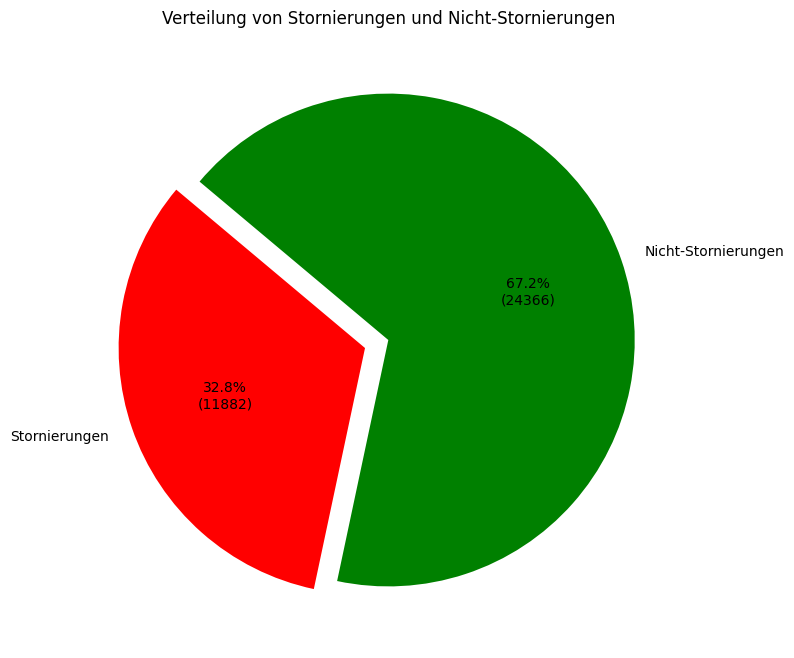

In [ ]:
# Counting the number of cancellations and non-cancellations
cancelled_counts = bookings[bookings['booking status'] == 1].shape[0]
not_cancelled_counts = bookings[bookings['booking status'] == 0].shape[0]
print("Number of rows for 'cancelled':", cancelled_counts)
print("Number of rows for 'not cancelled':", not_cancelled_counts)

# Creating the pie chart
plt.figure(figsize=(8, 8))

# Defining colors for the sections
colors = ['red', 'green']

# Exploding the cancellations
explode = (0.1, 0)

# Creating the pie chart with custom colors and exploding
patches, texts, autotexts = plt.pie([cancelled_counts, not_cancelled_counts], labels=[f'Stornierungen', f'Nicht-Stornierungen'], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Centering the texts in the pie chart
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Verteilung von Stornierungen und Nicht-Stornierungen')

# Manually position the count text above each section
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    # Get the percentage value
    percentage = autotext.get_text()
    # Get the corresponding count
    count = cancelled_counts if i == 0 else not_cancelled_counts
    # Display the count above the percentage
    autotext.set_text(f"{percentage}\n({count})")

# Saving the chart
plt.savefig('distribution_status.png', bbox_inches='tight')

plt.show()


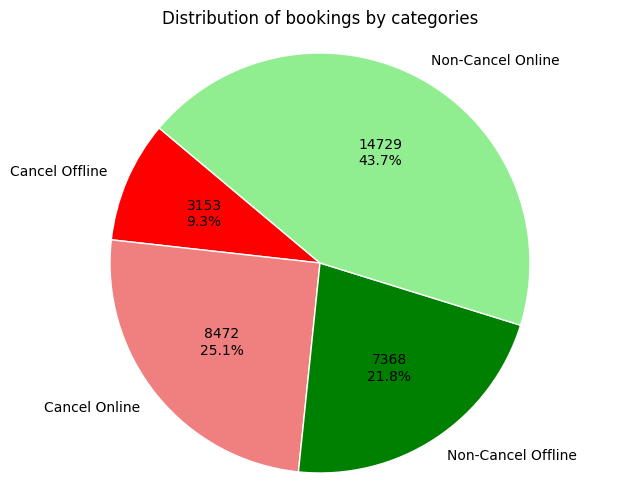

Conditional probability of cancellation for online bookings: 0.36515667428128096
Conditional probability of cancellation for offline bookings: 0.2996863416025093
Conditional probability of non-cancellation for online bookings: 0.634843325718719
Conditional probability of non-cancellation for offline bookings: 0.7003136583974907


In [ ]:
# Grouping bookings by categories
grouped_bookings = bookings.groupby(['booking status', 'market segment type_Offline', 'market segment type_Online']).size()

# Extracting the number of bookings in each group
offline_cancel = grouped_bookings[1, 1, 0] if (1, 1, 0) in grouped_bookings.index else 0
online_cancel = grouped_bookings[1, 0, 1] if (1, 0, 1) in grouped_bookings.index else 0
offline_non_cancel = grouped_bookings[0, 1, 0] if (0, 1, 0) in grouped_bookings.index else 0
online_non_cancel = grouped_bookings[0, 0, 1] if (0, 0, 1) in grouped_bookings.index else 0

# Creating the pie chart
labels = ['Cancel Offline', 'Cancel Online', 'Non-Cancel Offline', 'Non-Cancel Online']
sizes = [offline_cancel, online_cancel, offline_non_cancel, online_non_cancel]
colors = ['red', 'lightcoral', 'green', 'lightgreen']

# Function for displaying absolute numbers
def absolute_value(val):
    a = int(round(val/100.*sum(sizes), 0))
    return f'{a}\n{val:.1f}%'

plt.figure(figsize=(8, 6))
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
plt.pie(sizes, labels=labels, colors=colors, autopct=absolute_value, startangle=140, wedgeprops=wedgeprops)
plt.title('Distribution of bookings by categories')
plt.axis('equal')

# Saving the chart
plt.savefig('booking_distribution.png', bbox_inches='tight')

plt.show()

# Calculating conditional probabilities
prob_cancel_online = online_cancel / (online_cancel + online_non_cancel)
prob_cancel_offline = offline_cancel / (offline_cancel + offline_non_cancel)
prob_non_cancel_online = online_non_cancel / (online_cancel + online_non_cancel)
prob_non_cancel_offline = offline_non_cancel / (offline_cancel + offline_non_cancel)

# Outputting the calculated probabilities
print("Conditional probability of cancellation for online bookings:", prob_cancel_online)
print("Conditional probability of cancellation for offline bookings:", prob_cancel_offline)
print("Conditional probability of non-cancellation for online bookings:", prob_non_cancel_online)
print("Conditional probability of non-cancellation for offline bookings:", prob_non_cancel_offline)


Das Kreisdiagramm zeigt die Verteilung der Buchungen nach verschiedenen Kategorien, wobei die Stornierungen weiter in die Bestellkanäle Offline und Online unterteilt sind. Die meisten Buchungen, sowohl stornierte als auch nicht stornierte, erfolgen online. Von den stornierten Buchungen entfallen etwa 25,1% auf den Online-Bestellkanal, während 9,3% auf den Offline-Bestellkanal entfallen. Bei den nicht stornierten Buchungen dominieren ebenfalls die Online-Bestellungen mit 43,7%, gefolgt von den Offline-Bestellungen mit 21,8%.

Eine interessante Erkenntnis, die aus diesem Diagramm gezogen werden kann, ist die bedingte Wahrscheinlichkeit von Stornierungen für beide Kanäle. Die berechneten bedingten Wahrscheinlichkeiten zeigen, dass die Wahrscheinlichkeit für ein Storno bei Online-Buchungen höher ist als bei Offline-Buchungen. Etwa 36,5% der Online-Buchungen enden in einem Storno, während dieser Prozentsatz bei Offline-Buchungen etwa 30% beträgt. Dies legt nahe, dass Online-Buchungen eine höhere Stornowahrscheinlichkeit haben als Offline-Buchungen.

In [ ]:
# Calculating the ratio of cancellations to non-cancellations
ratio = cancelled_counts / not_cancelled_counts

# Setting the class weights for a balanced ratio
if ratio > 1:
    class_weights = {'cancellation': 1, 'non_cancellation': ratio}
else:
    class_weights = {'cancellation': 1 / ratio, 'non_cancellation': 1}

print("Ratio of cancellations to non-cancellations:", ratio)
print("Class weights for a balanced ratio:", class_weights)


Ratio of cancellations to non-cancellations: 0.48764672084051547
Class weights for a balanced ratio: {'cancellation': 2.050664871233799, 'non_cancellation': 1}


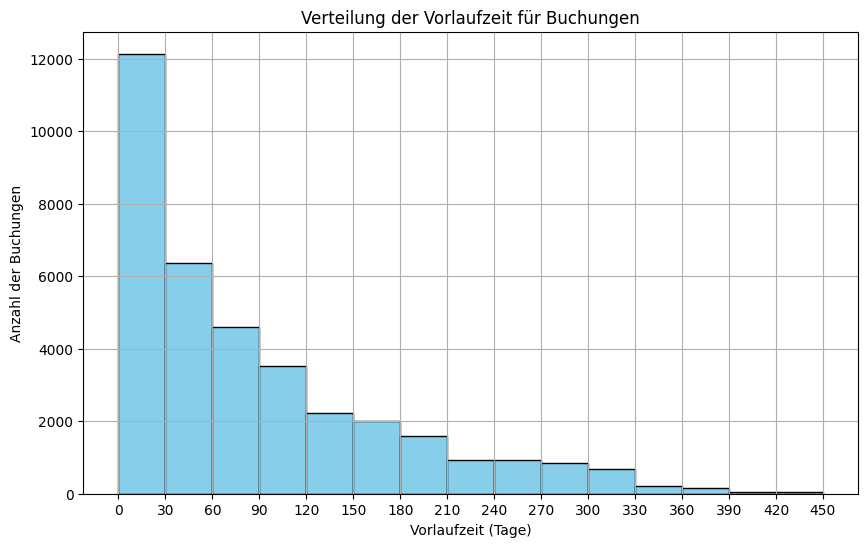

In [ ]:
# Plot Distribution of lead time
plt.figure(figsize=(10, 6))
plt.hist(bookings['lead time'], bins=15, range=(0, 450), color='skyblue', edgecolor='black')
plt.title('Verteilung der Vorlaufzeit für Buchungen')
plt.xlabel('Vorlaufzeit (Tage)')
plt.ylabel('Anzahl der Buchungen')
plt.xticks(np.arange(0, 451, 30))
plt.grid(True)

plt.savefig('distribution_leadtime.png', bbox_inches='tight')

plt.show()


Das Balkendiagramm zeigt die Verteilung der Vorlaufzeit für Buchungen in dem Datensatz. Die x-Achse repräsentiert die Vorlaufzeit in Tagen, während die y-Achse die Anzahl der Buchungen angibt. Die Balken zeigen, wie viele Buchungen innerhalb bestimmter Zeitintervalle getätigt wurden.

Die Interpretation des Diagramms zeigt, dass die meisten Buchungen in dem Monat vor dem geplanten Aufenthalt erfolgen. Über 12.000 Buchungen werden im Zeitraum von einem Monat vor dem geplanten Aufenthalt getätigt, gefolgt von über 6.000 Buchungen im Zeitraum von einem Monat bis zwei Monaten vorher und über 4.000 Buchungen im Zeitraum von zwei Monaten bis drei Monaten vorher. Es ist deutlich zu erkennen, dass die Anzahl der Buchungen von Monat zu Monat abnimmt, je weiter der Zeitpunkt des geplanten Aufenthalts in der Zukunft liegt.

Die Ergebnisse aus dem Balkendiagramm entsprechen den Erwartungen und verleihen dem Datensatz Glaubwürdigkeit. Es ist typisch, dass die meisten Buchungen in dem Monat vor dem geplanten Aufenthalt erfolgen, da die meisten Menschen ihre Reisen kurzfristig planen. Diese Erkenntnis unterstützt die Authentizität des Datensatzes und legt nahe, dass er relevante und realistische Informationen über das Buchungsverhalten von Hotelgästen enthält.

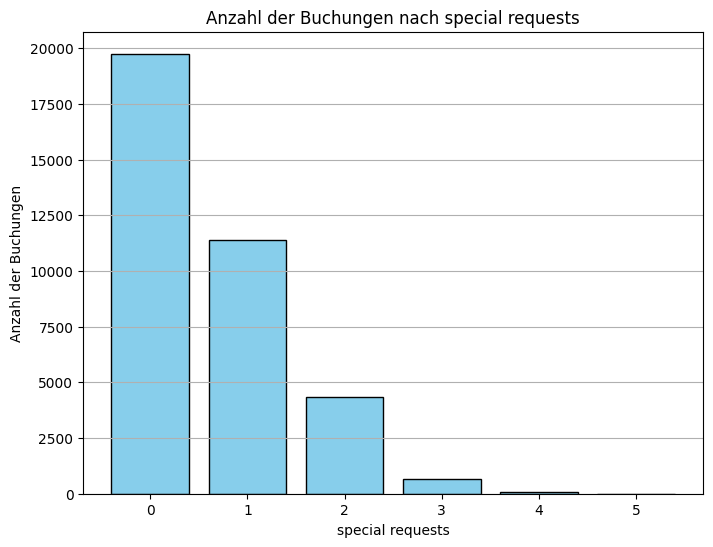

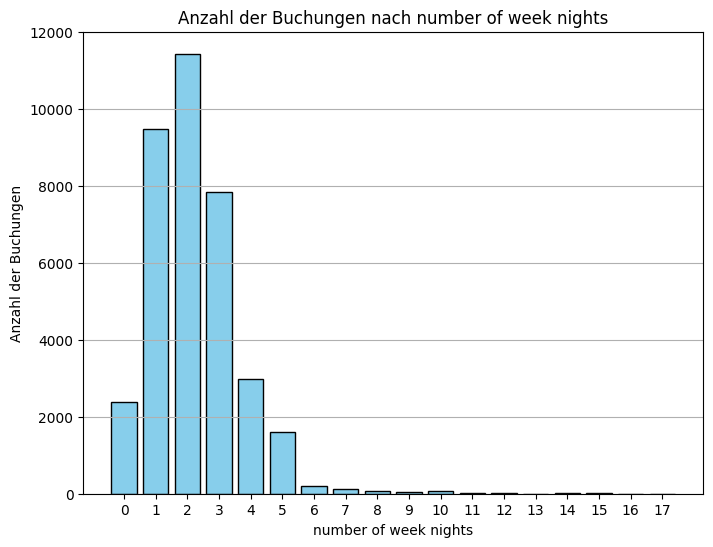

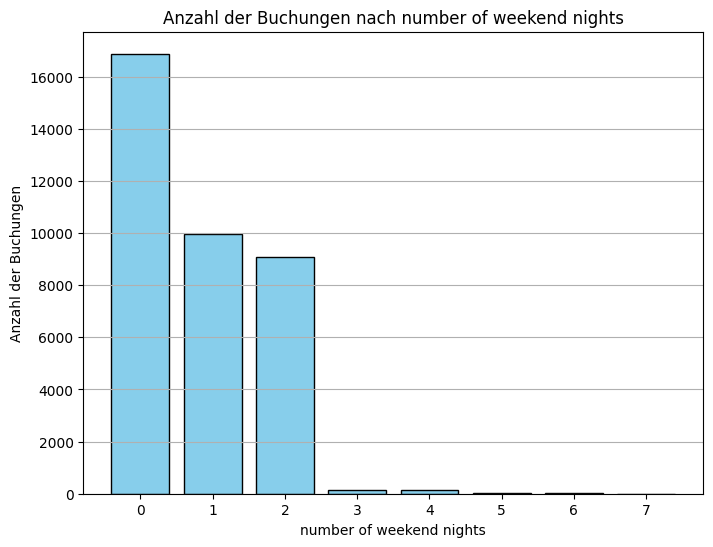

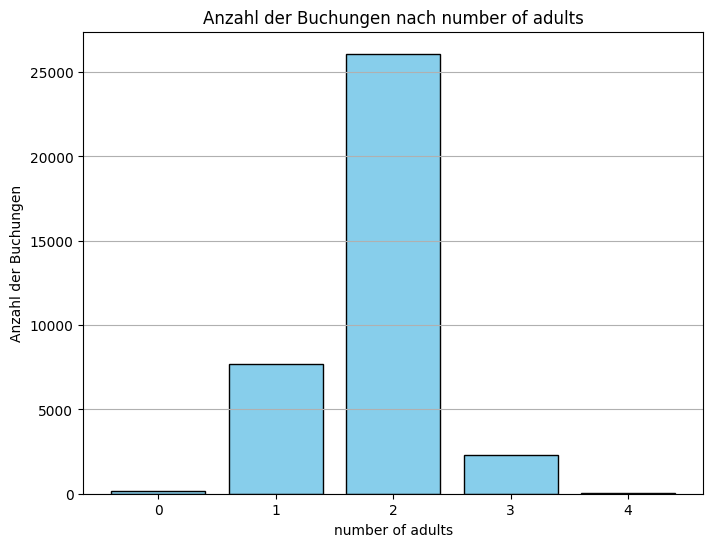

In [ ]:
# List of features
features = ['special requests', 'number of week nights', 'number of weekend nights', 'number of adults']

# Create plot for each feature
for feature in features:
    # Group bookings for each feature and count them
    feature_counts = bookings[feature].value_counts().sort_index()

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.bar(feature_counts.index, feature_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Anzahl der Buchungen nach {feature}')
    plt.xlabel(feature)
    plt.ylabel('Anzahl der Buchungen')
    plt.xticks(feature_counts.index)
    plt.grid(axis='y')
    plt.savefig(f'distribution_{feature}.png', bbox_inches='tight')
    plt.show()

Dasselbe scheint auch für die restlichen Features zu gelten, die im Folgenden noch näher betrachtet werden. Die Features zeigen, dass die meisten Hotelbuchungen auf eher kürzere Aufenthalte von 1-3 Erachsenen zurückzuführen sind. Die wenigen Ausreißer scheinen hier jedoch trotzdem plausibel, da es in der Realität mit Sicherheit auch wenige längere Aufenthalte von ca. 2 Wochen geben kann, besonders in typischen Urlaubszeiten.

In [ ]:
bookings_zero_adults = bookings[bookings['number of adults'] == 0]
bookings_zero_adults.head()
print("Anzahl der Datensätze mit 0 Erwachsenen:", len(bookings_zero_adults))

Anzahl der Datensätze mit 0 Erwachsenen: 139


# Korrigieren der Balanciertheit (Upsampling)

In [ ]:
from sklearn.utils import resample

# Splitting the dataset into cancellations and non-cancellations
#cancellations = bookings[bookings['booking status'] == 1]
#non_cancellations = bookings[bookings['booking status'] == 0]

# Number of cancellations and non-cancellations
#num_cancellations = len(cancellations)
#num_non_cancellations = len(non_cancellations)

# Performing upsampling (increasing the number of cancellations to match the number of non-cancellations)
#cancellations_upsampled = resample(cancellations, replace=True, n_samples=num_non_cancellations, random_state=42)

# Merging the newly upsampled dataset
#bookings_upsampled = pd.concat([non_cancellations, cancellations_upsampled])

# Displaying the distribution of classes after upsampling
#bookings_upsampled['booking status'].value_counts()


# Feature Engineering

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Splitting into features and target variable
X = bookings.drop('booking status', axis=1)
y = bookings['booking status']

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Training the model
rf_classifier.fit(X, y)

# Extracting the feature importance
feature_importance_rf = rf_classifier.feature_importances_

# Displaying the feature importance
feature_importance_bookings = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_importance_bookings = feature_importance_bookings.sort_values(by='Importance', ascending=False)
print(feature_importance_bookings)

# Determining the most important features

# Initializing the sum and the index
sum_importances = 0
n = 0

# Loop to sum the importances until the sum exceeds 0.9
for index, row in feature_importance_bookings.iterrows():
    sum_importances += row['Importance']
    n += 1
    if sum_importances >= 0.93:
        break

print("Number of top features:", n)
print("Sum of the top feature importance values:", sum_importances)
print(feature_importance_bookings[:n])


                              Feature  Importance
5                           lead time    0.424349
9                       average price    0.226052
10                   special requests    0.110532
3               number of week nights    0.065719
2            number of weekend nights    0.043999
0                    number of adults    0.026238
26         market segment type_Online    0.024670
25        market segment type_Offline    0.016958
1                  number of children    0.007526
12           type of meal_Meal Plan 2    0.007503
4                   car parking space    0.007423
11           type of meal_Meal Plan 1    0.006434
15              room type_Room_Type 1    0.005955
18              room type_Room_Type 4    0.005203
24      market segment type_Corporate    0.005023
14          type of meal_Not Selected    0.004838
6                            repeated    0.002988
16              room type_Room_Type 2    0.001898
8                     Pre-Not-Cancels    0.001832


Die Ermittlung der Feature-Importance ist ein entscheidender Schritt in der Analyse von Datensätzen, insbesondere in Machine Learning Projekten. Durch die Bestimmung der Feature-Importance können wir verstehen, welche Merkmale oder Variablen in einem Datensatz am stärksten zur Vorhersage des Zielwerts beitragen. Dies ermöglicht es uns, die relevantesten Informationen zu identifizieren und die Modellkomplexität zu reduzieren, indem wir uns auf die wichtigsten Merkmale konzentrieren.

In diesem Projekt wird die Feature-Importance mithilfe eines Random Forest Classifiers berechnet. Random Forest ist ein leistungsstarkes Ensemble-Lernverfahren, das auf der Aggregation mehrerer Entscheidungsbäume basiert. Es eignet sich gut für die Bestimmung der Feature-Importance, da es natürlicherweise die Relevanz verschiedener Merkmale während des Trainingsprozesses bewertet.

Die festgelegte Anforderung einer Feature-Abdeckung von mindestens 93% für dieses Projekt zielt darauf ab, sicherzustellen, dass unser Modell einen Großteil der relevanten Informationen im Datensatz berücksichtigt. Diese Entscheidung könnte in der Realität nach Rücksprache mit Fachleuten aus der Hotellerie getroffen werden, um sicherzustellen, dass keine wichtigen Merkmale übersehen werden. Dennoch dient diese pragmatische Festlegung dazu, die Komplexität des Projekts zu reduzieren und klare Richtlinien für die Auswahl der relevanten Merkmale festzulegen.

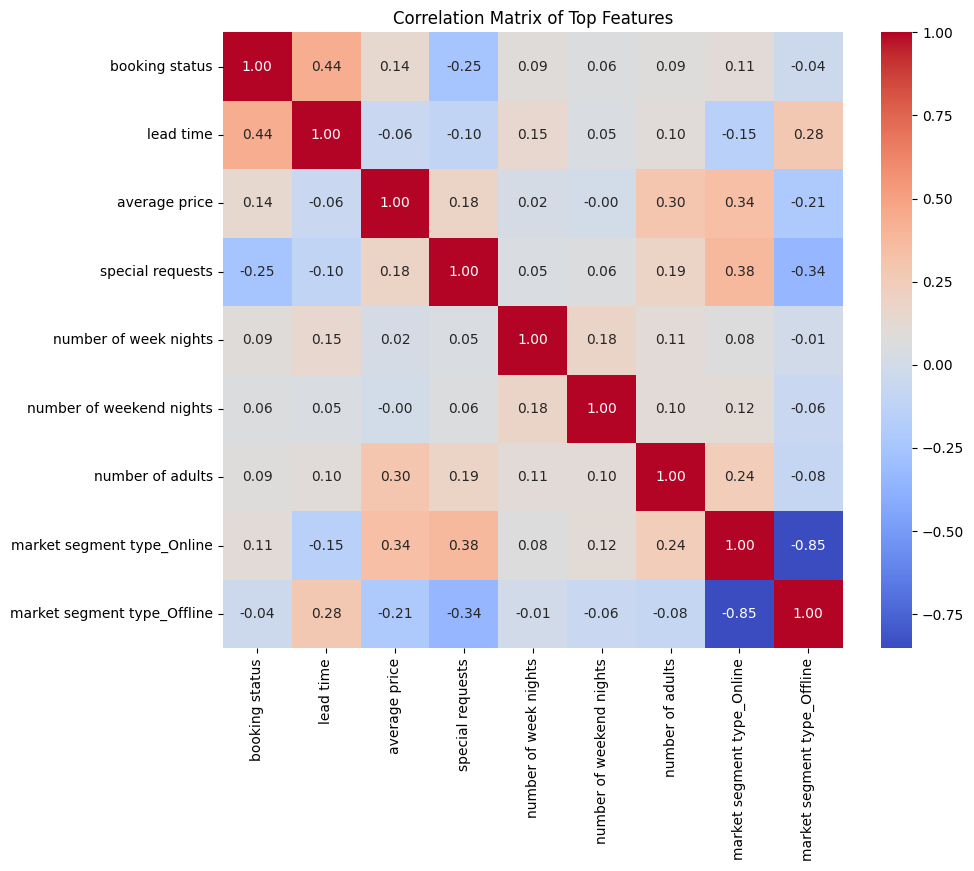

In [ ]:
# Selecting the top features
top_features = feature_importance_bookings.head(n)['Feature'].tolist()
top_features.insert(0, 'booking status')
# Selecting the corresponding columns from the original dataframe
bookings = bookings[top_features]

# Calculating the correlation matrix
correlation_matrix = bookings.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.savefig('correlationmatrix.png', bbox_inches='tight')
plt.show()

Die Untersuchung der Korrelationen zwischen den Features ist besonders interessant, um Zusammenhänge im Datensatz zu verstehen, insbesondere in Bezug auf den Buchungsstatus (Storno oder nicht). Ein Blick auf die Korrelationsmatrix zeigt, dass die Vorlaufzeit der Buchung einen signifikanten Einfluss auf die Stornierungswahrscheinlichkeit hat. Es ist zu beobachten, dass längere Vorlaufzeiten, höhere Preise, mehr gebuchte Nächte und mehr erwachsene Personen alle mit einer erhöhten Stornierungswahrscheinlichkeit einhergehen. Dies legt nahe, dass Kunden tendenziell eher stornieren, wenn sie frühzeitig, teuer, für längere Aufenthalte und für mehr Personen buchen. Eine bemerkenswerte Erkenntnis ist zudem die negative Korrelation zwischen der Anzahl der Sonderwünsche und der Stornierungswahrscheinlichkeit. Dies deutet darauf hin, dass Kunden, die viele Sonderwünsche haben, tendenziell weniger wahrscheinlich stornieren. Möglicherweise liegt dies daran, dass Kunden mit spezifischen Anfragen bereits eine feste Absicht haben, im Hotel zu übernachten, und sich daher weniger wahrscheinlich für eine Stornierung entscheiden.

<Figure size 1000x800 with 0 Axes>

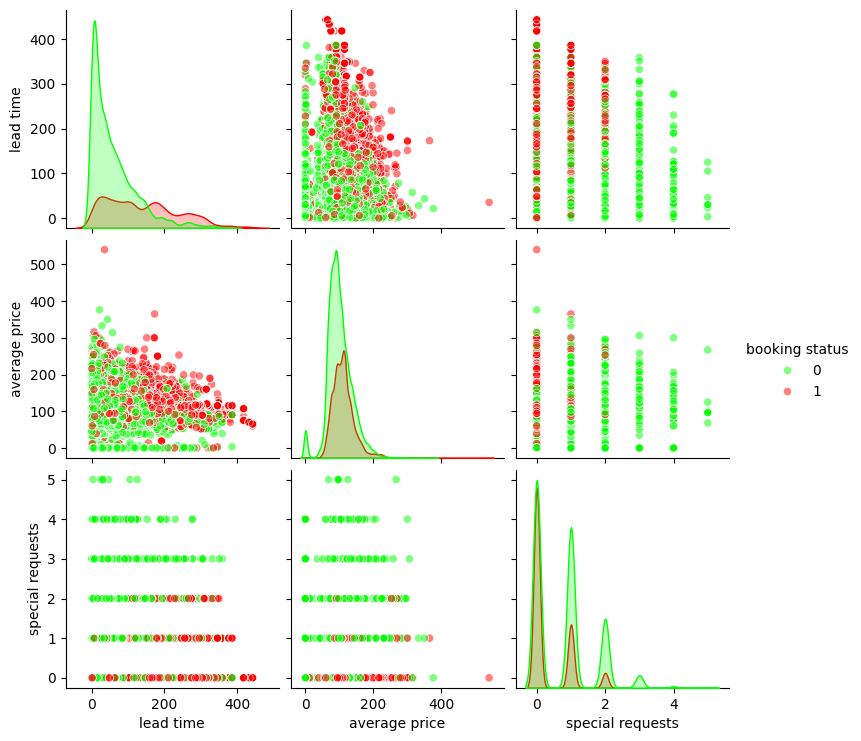

In [ ]:
# Pairplot
custom_palette = {1: (1, 0, 0, 0.5), 0: (0, 1, 0, 0.5)}
plt.figure(figsize=(10, 8))
sns.pairplot(data=bookings, vars=['lead time', 'average price', 'special requests'], hue='booking status', palette=custom_palette)
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show()


# Analyse der Ausreißer

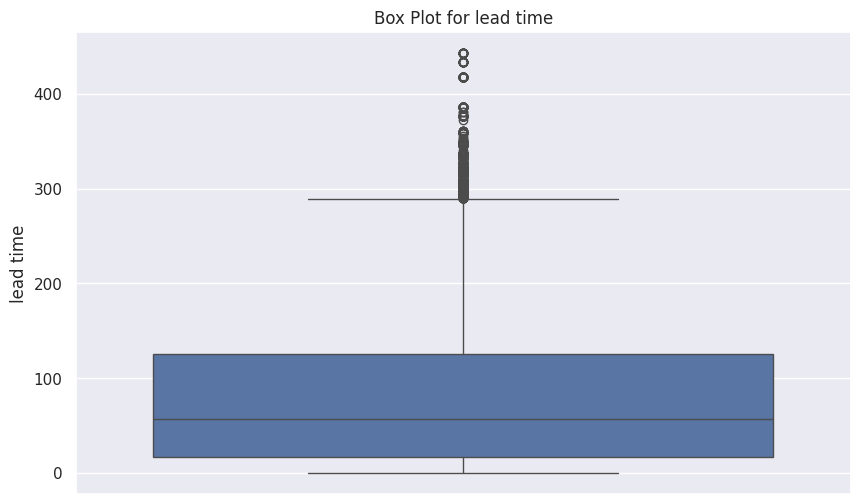

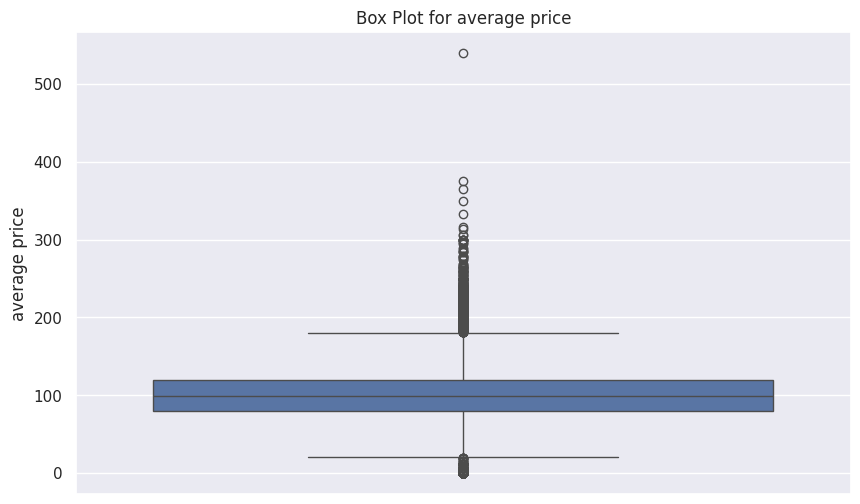

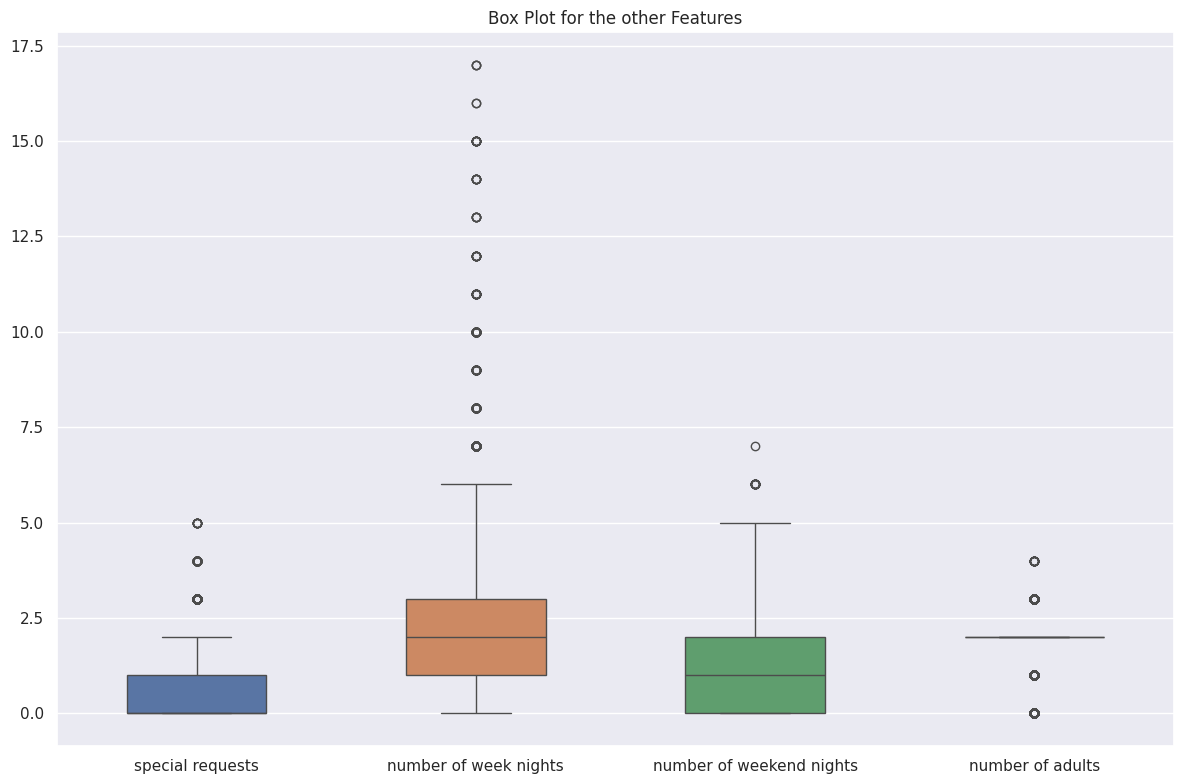

In [ ]:
# Dropping Outliers

# Boxplot before removing outliers
# List of columns to be excluded
exclude_columns = [col for col in bookings.columns if col.startswith(('type of meal', 'room type', 'market segment', 'booking status', 'lead time', 'average price'))]

# Creating DataFrame without the excluded columns
bookings_boxplot = bookings.drop(columns=exclude_columns)

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['lead time'], orient="v")
plt.title("Box Plot for lead time")
plt.savefig('boxplot_leadtime.png', bbox_inches='tight')
plt.show()

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['average price'], orient="v")
plt.title("Box Plot for average price")
plt.savefig('boxplot_price.png', bbox_inches='tight')
plt.show()

# Creating the boxplot for the other features
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=bookings_boxplot, orient="v", width=0.5)  # Adjust the width of the bars for better centering
plt.title("Box Plot for the other Features")
plt.xticks(rotation=0)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust the layout for better label


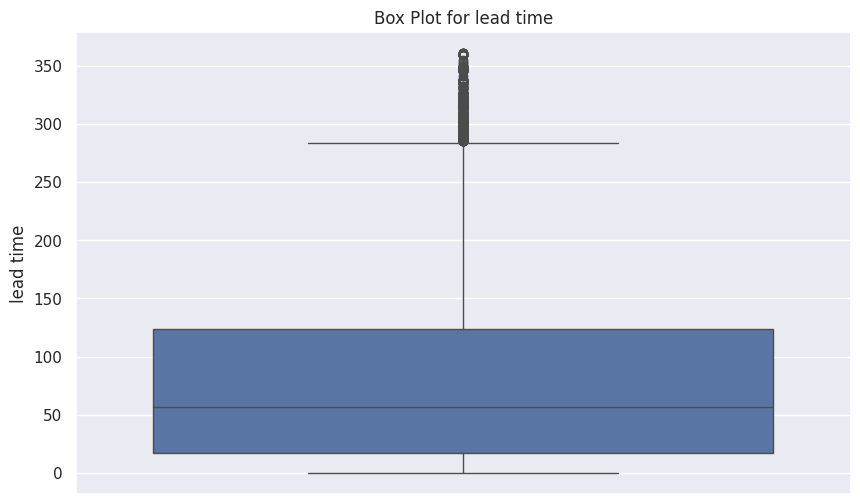

In [ ]:
# Dropping Outliers
bookings_old = bookings

# Remove data with lead time over 365 days
bookings = bookings[bookings['lead time'] <= 365]

# outlier per quantiles
# outlier_columns = ["lead time", "average price"]
# for column in outlier_columns:
    # if bookings[column].dtype in ["int64", "float64"]:
    #     q1 = bookings[column].quantile(0.25)
    #     q3 = bookings[column].quantile(0.75)
    #     diff_q3q1 = q3 - q1
    #     lower_bound = q1 - 1.5 * diff_q3q1
    #     upper_bound = q3 + 1.5 * diff_q3q1
    #     bookings = bookings[
    #         (bookings[column] >= lower_bound) & (bookings[column] <= upper_bound)
    #     ]

# Create box plots for every variable after dropping outliers
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['lead time'], orient="v")
plt.title("Box Plot for lead time")
plt.savefig('boxplot_leadtime2.png', bbox_inches='tight')
plt.show()

# Splitten des Datensatzes

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training data, 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the testing data into testing and validation sets (50% testing data, 50% validation data)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Korrigieren der Balanciertheit
Hier bitte angeben, welcher Datensatz genutzt werden soll!

In [ ]:
from sklearn.utils import resample

# Choose the desired dataset (original data, upsampled data, or undersampled data)
dataset_choice = "upsampled"  # Modify this as needed ("original", "upsampled", or "undersampled")

if dataset_choice == "original":
    # Use original data for training
    X_train = X_train
    y_train = y_train
elif dataset_choice == "upsampled":
  # Concatenating the features and target variable for the training set
  train_data = pd.concat([X_train, y_train], axis=1)

  # Splitting the training set into cancellations and non-cancellations
  cancellations_train = train_data[train_data['booking status'] == 1]
  non_cancellations_train = train_data[train_data['booking status'] == 0]

  # Number of cancellations and non-cancellations
  num_cancellations_train = len(cancellations_train)
  num_non_cancellations_train = len(non_cancellations_train)

  # Performing upsampling (increasing the number of cancellations to match the number of non-cancellations)
  cancellations_upsampled_train = resample(cancellations_train, replace=True, n_samples=num_non_cancellations_train, random_state=42)

  # Merging the newly upsampled dataset with non-cancellations
  train_data_upsampled = pd.concat([non_cancellations_train, cancellations_upsampled_train])

  # Separating the features and target variable for the upsampled training set
  X_train_upsampled = train_data_upsampled.drop('booking status', axis=1)
  y_train_upsampled = train_data_upsampled['booking status']

  # Displaying the distribution of classes after upsampling
  train_data_upsampled['booking status'].value_counts()

  X_train = X_train_upsampled
  y_train = y_train_upsampled
else:
  raise ValueError("Invalid dataset choice. Please choose either 'original', 'upsampled', or 'undersampled'.")


# Auswahl der Metriken

Für die Optimierung des Modells wird der F1-Score als Metrik gewählt, da er ein ausgewogenes Maß für Precision und Recall bietet. Bei der Vorhersage von Buchungsstornierungen ist es entscheidend, sowohl wahre Stornierungen korrekt zu identifizieren (Recall), um potenzielle Umsatzverluste zu minimieren, als auch falsche Stornierungsvorhersagen zu reduzieren (Precision), um unnötige Kosten zu vermeiden. Die ausschließliche Optimierung von Precision oder Recall könnte zu einem Ungleichgewicht führen, das entweder zu vielen falsch vorhergesagten Stornierungen oder zu vielen nicht erkannten Stornierungen führt. Der F1-Score ermöglicht eine ausgewogene Bewertung. Der ROC (Receiver Operating Characteristic) und der zugehörige AUC (Area Under Curve) bieten eine alternative Sichtweise auf die Leistung des Modells und sind besonders nützlich, um die Balance zwischen True Positive Rate (Recall) und False Positive Rate (FPR) zu verstehen.

# Ermittlung geeigneter ML Classifier

In [ ]:
from sklearn.metrics import f1_score

# Function for creating ML models including evaluation visualization
def train_predict_evaluate(model, X_train, X_test, y_train, y_test, cmap:str, pathSave:str):
    """
    This function trains a machine learning model, makes predictions on the test data,
    evaluates the model using the confusion matrix, and saves the visualization.

    Parameters:
    model : obj
        The machine learning model to be trained and evaluated.
    X_train : array-like
        The feature matrix of the training data.
    X_test : array-like
        The feature matrix of the test data.
    y_train : array-like
        The target labels of the training data.
    y_test : array-like
        The target labels of the test data.
    cmap : str
        The color map for the visualization of the confusion matrix.
    pathSave : str
        The file path where the visualization will be saved.
    """

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = model.predict(X_test)

    # Outputting the classification report
    print(classification_report(y_test, y_pred))

    # Calculating the F1-score
    f1 = f1_score(y_test, y_pred)

    # Calculating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculating the percentage values within the absolute frequencies of each quadrant
    total_samples = np.sum(conf_matrix)
    conf_matrix_percent = conf_matrix / total_samples * 100

    # Creating the combined matrix with classifications and percentage values
    combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if i == 0 and j == 0:
                combined_matrix[i][j] = f"TN: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            elif i == 0 and j == 1:
                combined_matrix[i][j] = f"FP: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            elif i == 1 and j == 0:
                combined_matrix[i][j] = f"FN: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            else:
                combined_matrix[i][j] = f"TP: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

    # Visualizing the confusion matrix as a heatmap with absolute frequencies, percentage values, and classifications
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=combined_matrix, cmap=cmap, fmt='', cbar=False)
    plt.title(f'Confusion Matrix ({type(model).__name__})')
    plt.xlabel('Predicted Booking Status')
    plt.ylabel('True Booking Status')
    plt.savefig(pathSave, bbox_inches='tight')
    plt.show()


              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4881
           1       0.63      0.77      0.69      2369

    accuracy                           0.78      7250
   macro avg       0.75      0.77      0.76      7250
weighted avg       0.79      0.78      0.78      7250

F1-Score: 0.6908883393570476


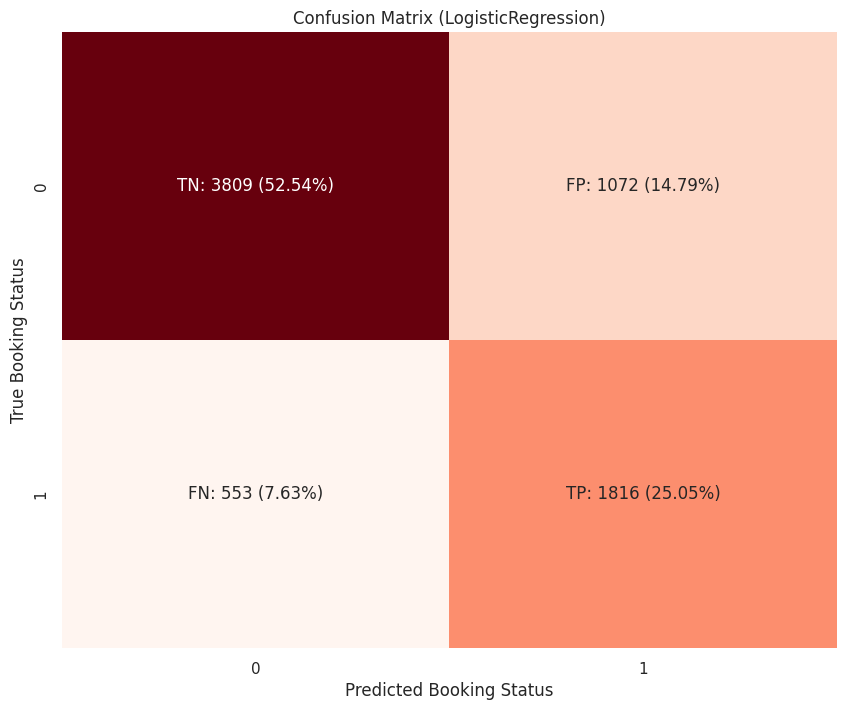

In [ ]:
# Init Logistic Regression Classifier
lr_model = LogisticRegression()

# Train, predict, evaluate with custom function
train_predict_evaluate(lr_model, X_train, X_test, y_train, y_test, 'Reds', pathSave='confusionmatrix_Log_upsampled.png')

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4881
           1       0.63      0.76      0.69      2369

    accuracy                           0.78      7250
   macro avg       0.75      0.77      0.76      7250
weighted avg       0.79      0.78      0.78      7250

F1-Score: 0.6894696387394312


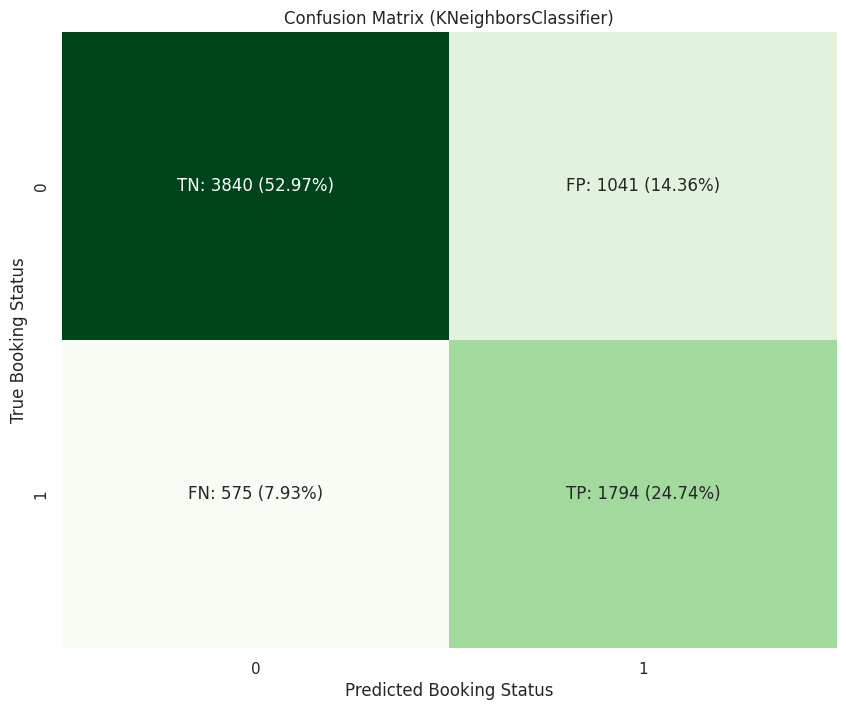

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Init kNN
knn_model = KNeighborsClassifier()

# Train, predict, evaluate
train_predict_evaluate(knn_model, X_train, X_test, y_train, y_test, 'Greens', pathSave='confusionmatrix_kNN_upsampled.png')

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4881
           1       0.77      0.76      0.76      2369

    accuracy                           0.85      7250
   macro avg       0.83      0.82      0.82      7250
weighted avg       0.85      0.85      0.85      7250

F1-Score: 0.7638595006347864


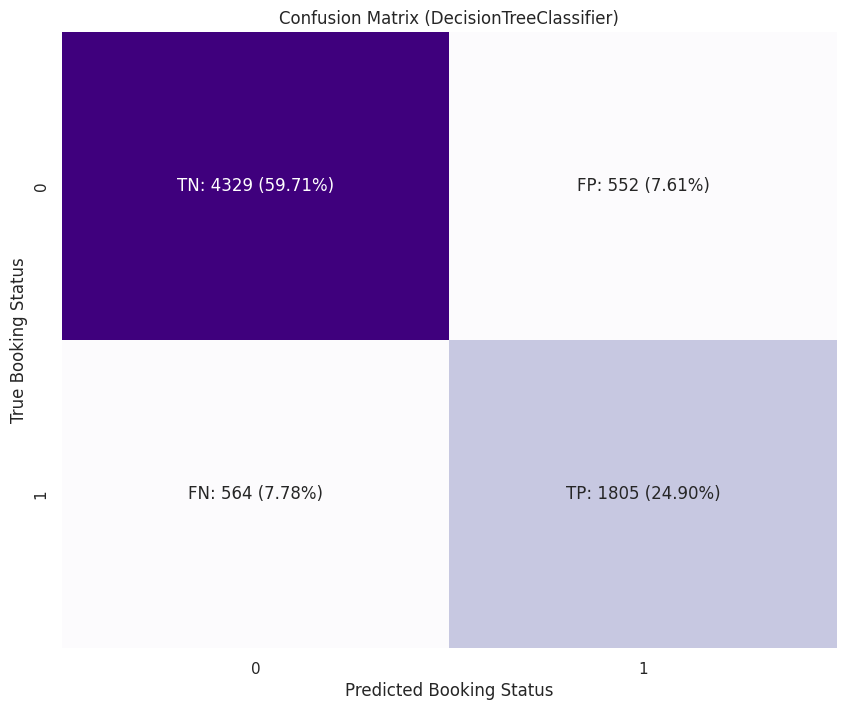

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Init Decision Tree
dt_model = DecisionTreeClassifier()

# Train, predict, evaluate
train_predict_evaluate(dt_model, X_train, X_test, y_train, y_test, cmap='Purples', pathSave='confusionmatrix_DecTree_upsampled.png')

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      4881
           1       0.71      0.78      0.74      2369

    accuracy                           0.82      7250
   macro avg       0.80      0.81      0.80      7250
weighted avg       0.83      0.82      0.83      7250

F1-Score: 0.7429831595829992


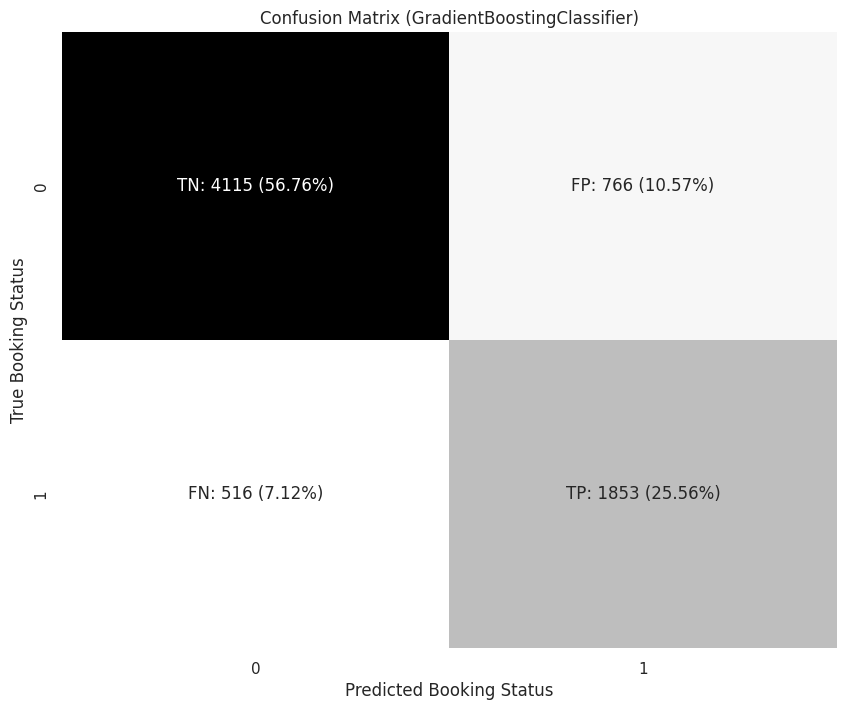

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initi GBM
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train, predict, evaluate
train_predict_evaluate(gbm_model, X_train, X_test, y_train, y_test, cmap='Greys', pathSave='confusionmatrix_GBM_upsampled.png')

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4881
           1       0.82      0.80      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.86      0.86      0.86      7250
weighted avg       0.87      0.88      0.87      7250

F1-Score: 0.8067550235143224


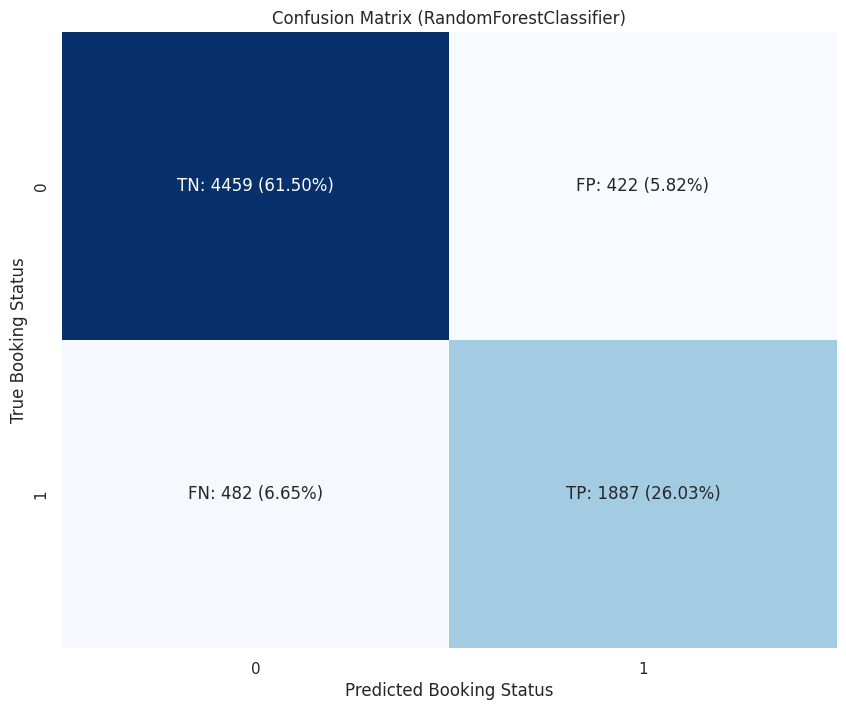

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Init Random Forest
rf_model = RandomForestClassifier()

# Train, predict, evaluate
train_predict_evaluate(rf_model, X_train, X_test, y_train, y_test, cmap='Blues', pathSave='confusionmatrix_RandomForest_upsampled.png')

Number of rows for 'cancelled': 11651
Number of rows for 'not cancelled': 24354
Cancellation Weight: 1.5451463393700111
Non-Cancellation Weight: 0.7392009526155867
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4881
           1       0.82      0.79      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.86      0.85      0.86      7250
weighted avg       0.87      0.88      0.87      7250



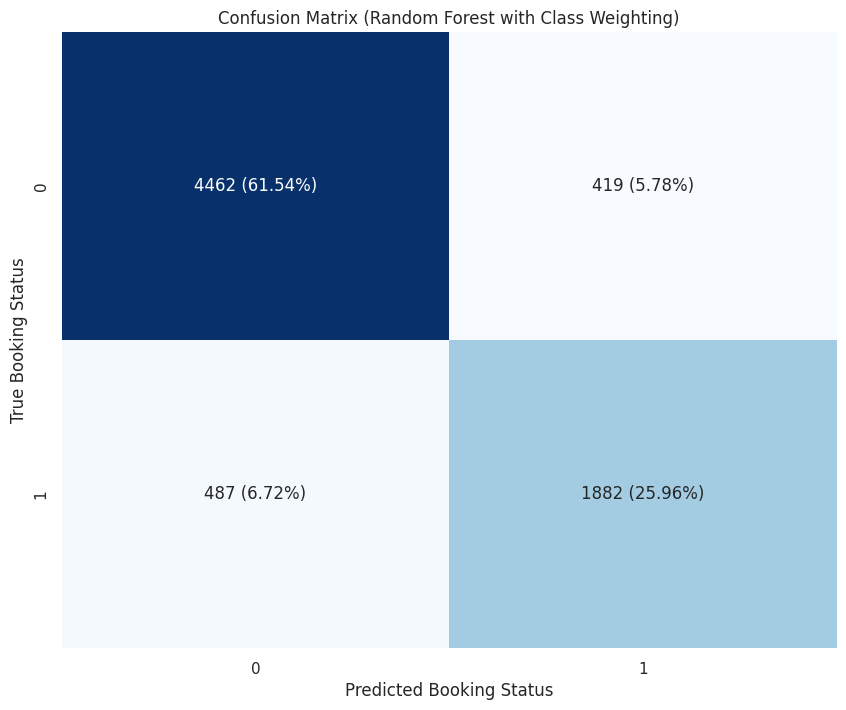

In [ ]:
# Counting the number of cancellations and non-cancellations
cancelled_counts = bookings[bookings['booking status'] == 1].shape[0]
not_cancelled_counts = bookings[bookings['booking status'] == 0].shape[0]

print("Number of rows for 'cancelled':", cancelled_counts)
print("Number of rows for 'not cancelled':", not_cancelled_counts)

# Calculating the ratio of the two classes (Cancellation, Non-Cancellation)
total_samples = cancelled_counts + not_cancelled_counts
class_weight_cancelled = total_samples / (2 * cancelled_counts)
class_weight_not_cancelled = total_samples / (2 * not_cancelled_counts)
print('Cancellation Weight:', class_weight_cancelled)
print('Non-Cancellation Weight:', class_weight_not_cancelled)

# Formatting the class weights as a dictionary
class_weights = {0: class_weight_not_cancelled, 1: class_weight_cancelled}

# Initializing and training the Random Forest model with class weighting
rf_model_weighted = RandomForestClassifier(class_weight=class_weights)
rf_model_weighted.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_model_weighted.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating the percentage values within the absolute frequencies of each quadrant
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Creating the combined matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualizing the confusion matrix as a heatmap with absolute frequencies and percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Random Forest with Class Weighting)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_weighted.png', bbox_inches='tight')
plt.show()


# Hyperparameter-Tuning
Anzahl der Datensätze anpassbar (über sample_data) um Funktion zu prüfen

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best model: RandomForestClassifier(n_estimators=200)
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4881
           1       0.82      0.80      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.86      0.86      0.86      7250
weighted avg       0.88      0.88      0.88      7250



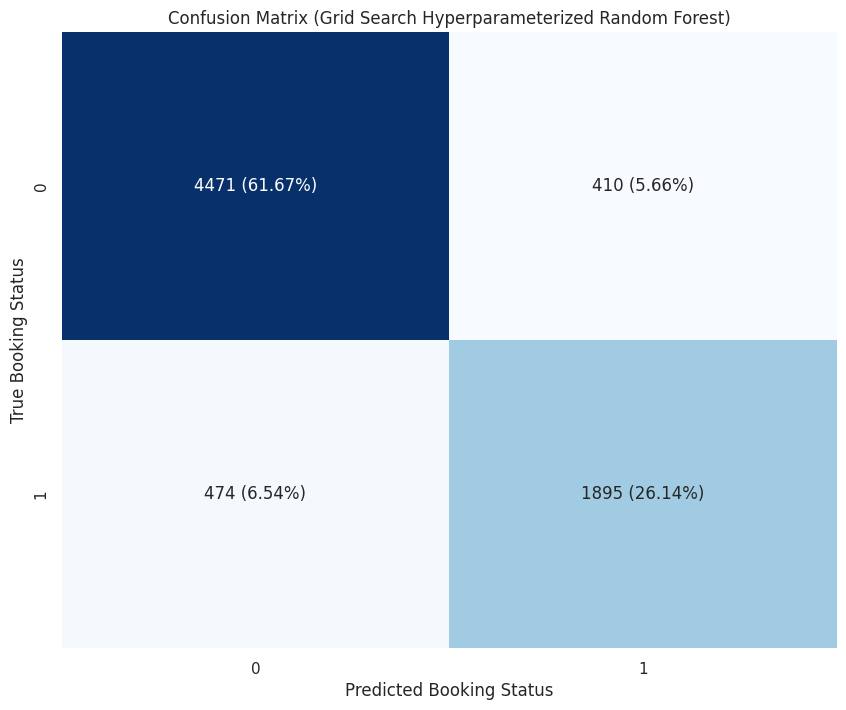

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

sample_data = False  # Switch for toggling between original and sampled data

# Define the sample size
sample_size = 100  # Adjust the desired number of data points

# Draw a random sample from the training dataset
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.sample(n=sample_size, random_state=42)

if sample_data:
    X_train_used = X_train_sample
    y_train_used = y_train_sample
else:
    X_train_used = X_train
    y_train_used = y_train

# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Choose the model
rf_model = RandomForestClassifier()

# Define the scoring metric
scoring = 'f1'

# Create the Grid Search instance
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, cv=5, verbose=1)

# Perform the Grid Search
grid_search.fit(X_train_used, y_train_used)

# Output the best model and its hyperparameters
print("Best model:", grid_search.best_estimator_)
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test data using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage values within the absolute frequencies of each quadrant
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Create the combined matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualize the confusion matrix as a heatmap with absolute frequencies and percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Grid Search Hyperparameterized Random Forest)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_tuned.png', bbox_inches='tight')
plt.show()

# Vorhersage-Demo
Ausführen, um die Vorhersage eines zufällig ausgewählten Punktes durchzuführen

In [ ]:
import random

# Simulating a single prediction
random_index = random.randint(0, len(X_test) - 1)
random_data = X_test.iloc[random_index]
true_label = y_test.iloc[random_index]

# Making prediction with the trained model
predicted_label = rf_model.predict([random_data])

# Outputting randomly selected data points for the top features
important_random_data = random_data[feature_importance_bookings['Feature'][:n]]

print("Randomly selected data point:")
for feature, value in zip(important_random_data.index, important_random_data):
    print(f"{feature}: {value}")

# Outputting the prediction and the true label
print("----------------------------------")
print("Predicted Booking Status:", predicted_label)
print("True Booking Status:", true_label)


Randomly selected data point:
lead time: 3
average price: 136
special requests: 0
number of week nights: 1
number of weekend nights: 2
number of adults: 2
market segment type_Online: 1
market segment type_Offline: 0
----------------------------------
Predicted Booking Status: [1]
True Booking Status: 0


In [ ]:
#!pip freeze > requirements.txt

# Archiv
Dies ist eine Ablage für "verworfenen Code", der zum Beispiel oben in optimierter Form zu finden ist oder für den Report irrelevant ist.
Hier sind jedoch die ROC-Kurven zu finden.

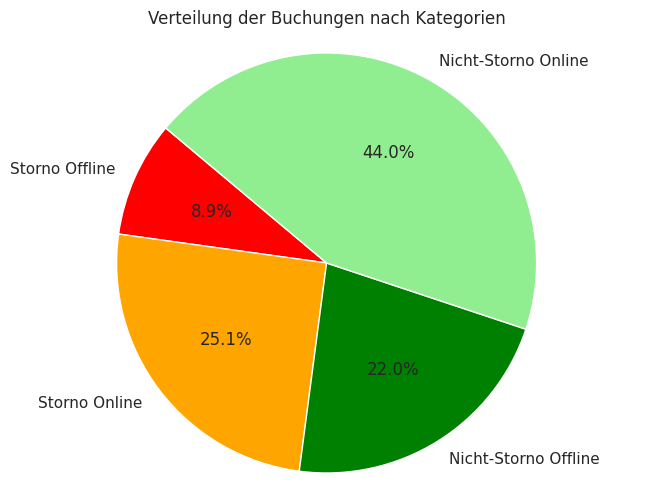

In [ ]:
# Gruppierung der Buchungen nach den Kategorien
grouped_bookings = bookings.groupby(['booking status', 'market segment type_Offline', 'market segment type_Online']).size()

# Extrahieren der Anzahl der Buchungen in jeder Gruppe
offline_storno = grouped_bookings[1, 1, 0] if (1, 1, 0) in grouped_bookings.index else 0
online_storno = grouped_bookings[1, 0, 1] if (1, 0, 1) in grouped_bookings.index else 0
offline_non_storno = grouped_bookings[0, 1, 0] if (0, 1, 0) in grouped_bookings.index else 0
online_non_storno = grouped_bookings[0, 0, 1] if (0, 0, 1) in grouped_bookings.index else 0

# Erstellen des Kreisdiagramms
labels = ['Storno Offline', 'Storno Online', 'Nicht-Storno Offline', 'Nicht-Storno Online']
sizes = [offline_storno, online_storno, offline_non_storno, online_non_storno]
colors = ['red', 'orange', 'green', 'lightgreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Buchungen nach Kategorien')
plt.axis('equal')
plt.show()

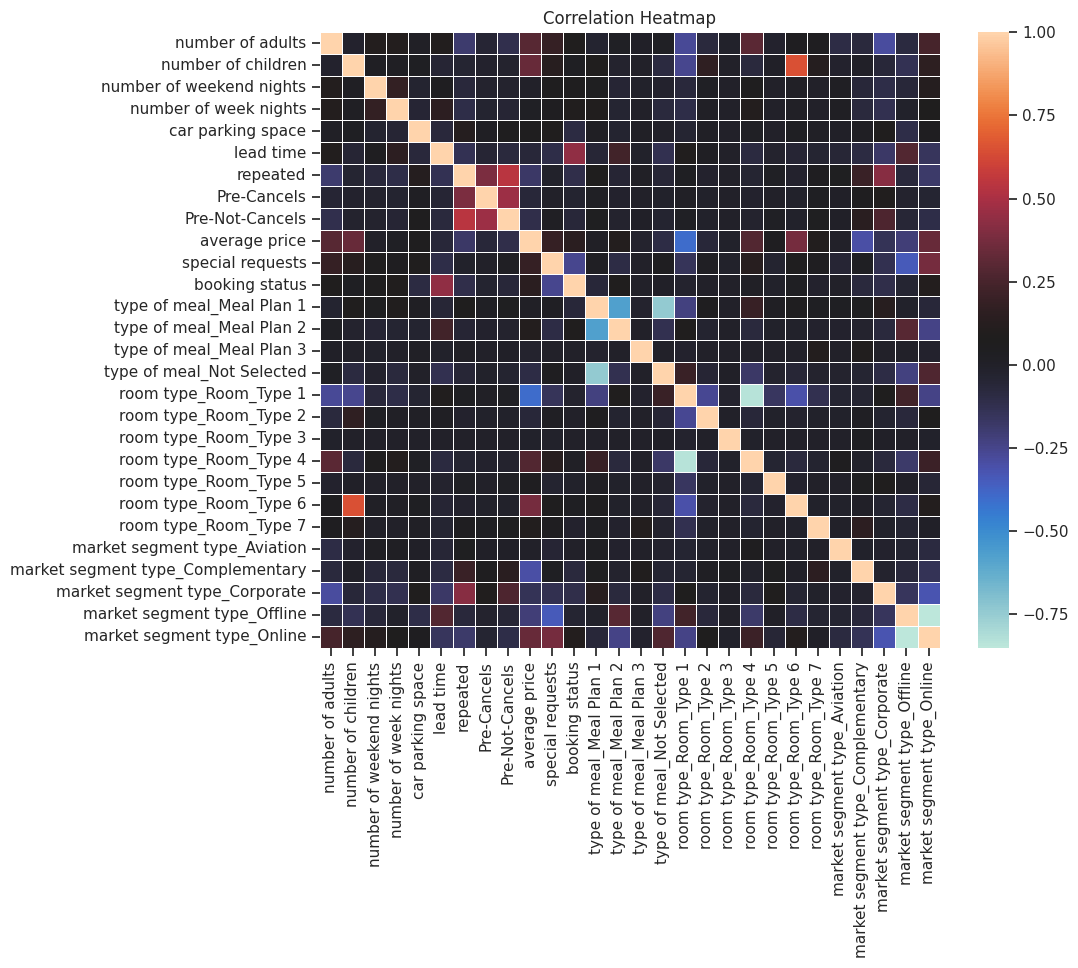

In [ ]:
#bookings.info()

plt.figure(figsize=(10, 8))
sns.heatmap(bookings.corr(), cmap="icefire", linewidths=0.6)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.utils import resample
# Undersampling

# Aufteilen des Datensatzes in Storno und Nicht-Storno
stornos = bookings[bookings['booking status'] == 1]
nicht_stornos = bookings[bookings['booking status'] == 0]

# Anzahl der Stornos und Nicht-Stornos
num_stornos = len(stornos)
num_nicht_stornos = len(nicht_stornos)

# Undersampling durchführen (Anzahl der Nicht-Stornos auf Anzahl der Stornos reduzieren)
nicht_stornos_undersampled = resample(nicht_stornos, replace=False, n_samples=num_stornos, random_state=42)

# Den neu abgetasteten Datensatz zusammenführen
bookings_undersampled = pd.concat([nicht_stornos_undersampled, stornos])

# Anzeigen der Verteilung der Klassen nach dem Undersampling
bookings_undersampled['booking status'].value_counts()


0    11882
1    11882
Name: booking status, dtype: int64

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      4803
           1       0.81      0.87      0.84      4944

    accuracy                           0.83      9747
   macro avg       0.83      0.83      0.83      9747
weighted avg       0.83      0.83      0.83      9747



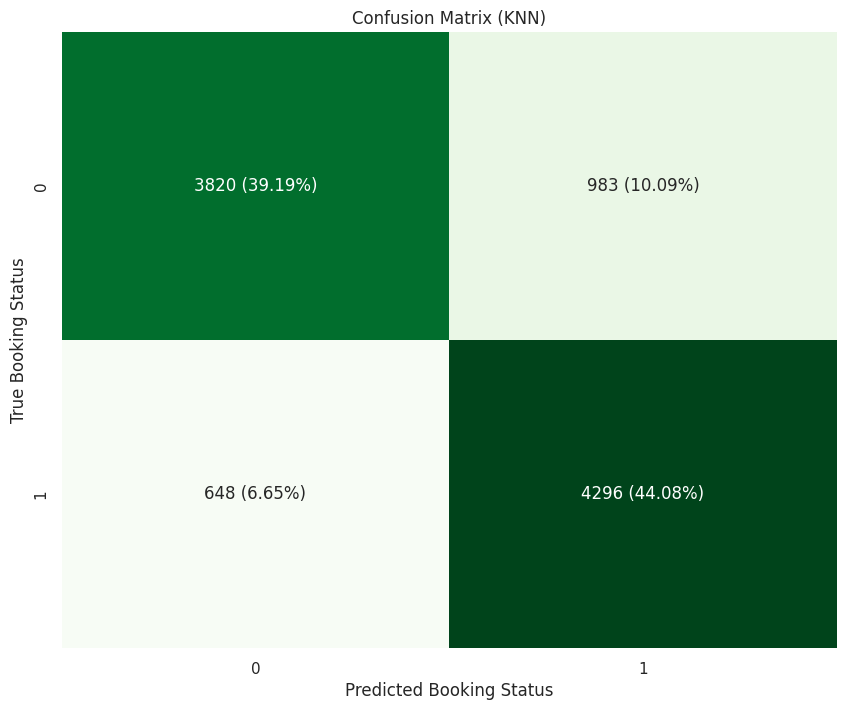

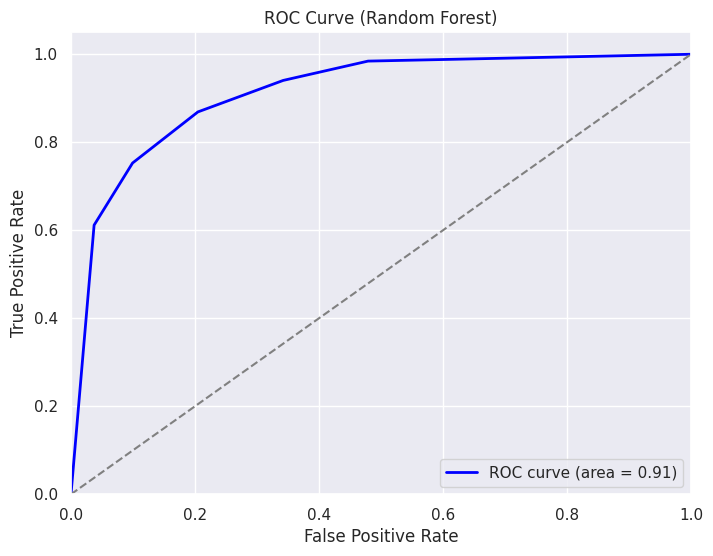

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisierung und Training des KNN-Modells
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred_knn = knn_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred_knn))

# Berechnung der Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix_knn)
conf_matrix_knn_percent = conf_matrix_knn / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix_knn = np.empty((conf_matrix_knn.shape[0], conf_matrix_knn.shape[1]), dtype=object)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        combined_matrix_knn[i][j] = f"{conf_matrix_knn[i][j]} ({conf_matrix_knn_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=combined_matrix_knn, cmap='Greens', fmt='', cbar=False)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_kNN_upsampled.png', bbox_inches='tight')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Berechnung des ROC-AUC-Werts
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4803
           1       0.90      0.95      0.92      4944

    accuracy                           0.92      9747
   macro avg       0.92      0.92      0.92      9747
weighted avg       0.92      0.92      0.92      9747



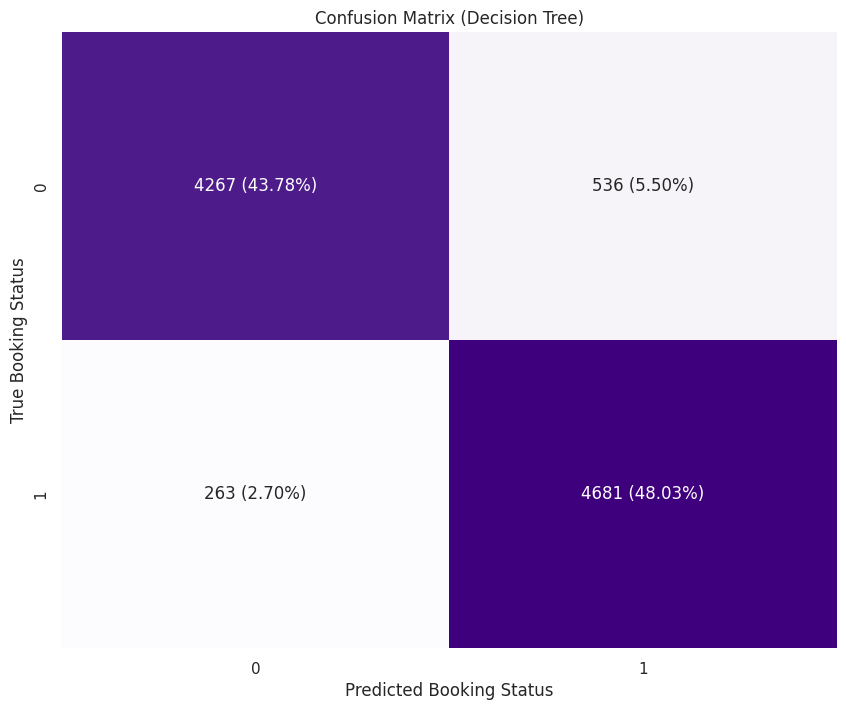

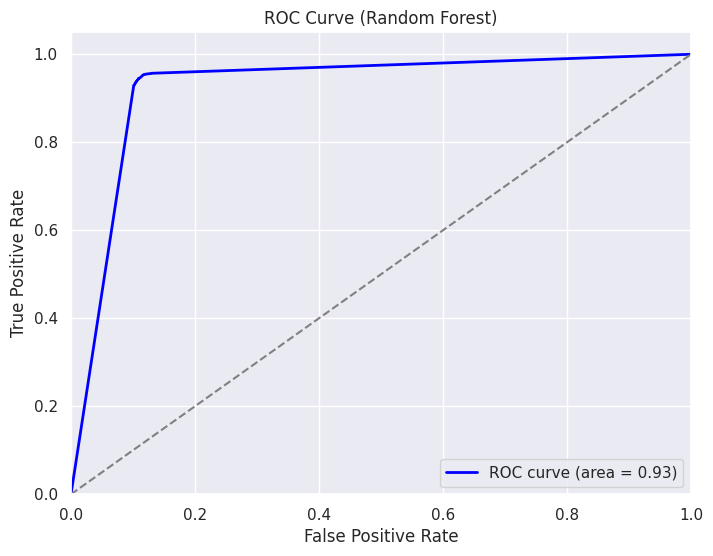

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialisierung und Training des Decision Tree-Modells
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred_dt = dt_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred_dt))

# Berechnung der Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix_dt)
conf_matrix_dt_percent = conf_matrix_dt / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix_dt = np.empty((conf_matrix_dt.shape[0], conf_matrix_dt.shape[1]), dtype=object)
for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        combined_matrix_dt[i][j] = f"{conf_matrix_dt[i][j]} ({conf_matrix_dt_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=combined_matrix_dt, cmap='Purples', fmt='', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_DecTree_upsampled.png', bbox_inches='tight')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Berechnung des ROC-AUC-Werts
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4803
           1       0.81      0.81      0.81      4944

    accuracy                           0.80      9747
   macro avg       0.80      0.80      0.80      9747
weighted avg       0.80      0.80      0.80      9747



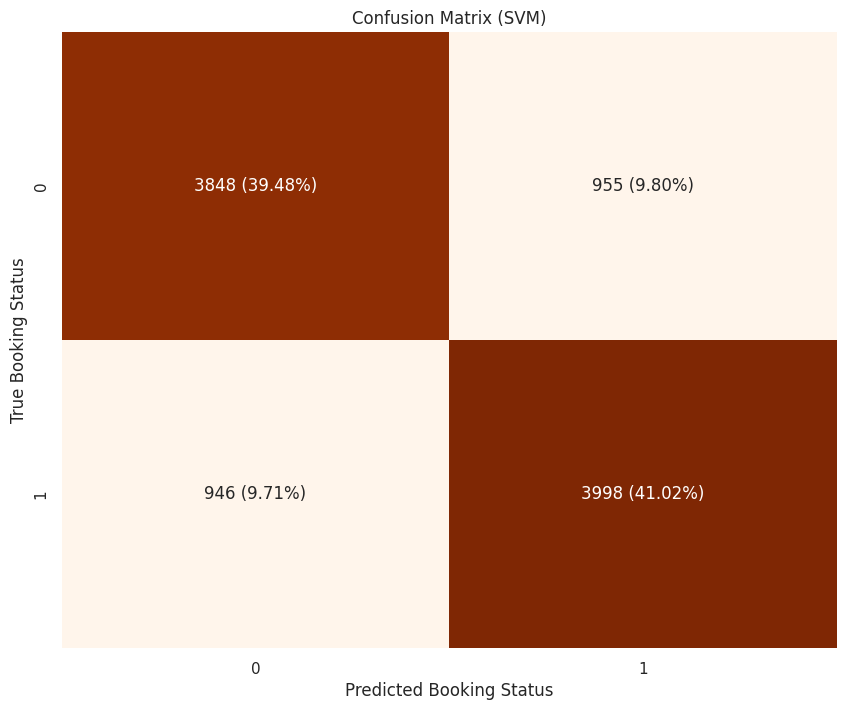

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Skalierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modell erstellen und trainieren
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Modell evaluieren
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Oranges', fmt='', cbar=False)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_SVM_upsampled.png', bbox_inches='tight')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Berechnung des ROC-AUC-Werts
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4803
           1       0.84      0.79      0.81      4944

    accuracy                           0.82      9747
   macro avg       0.82      0.82      0.82      9747
weighted avg       0.82      0.82      0.82      9747



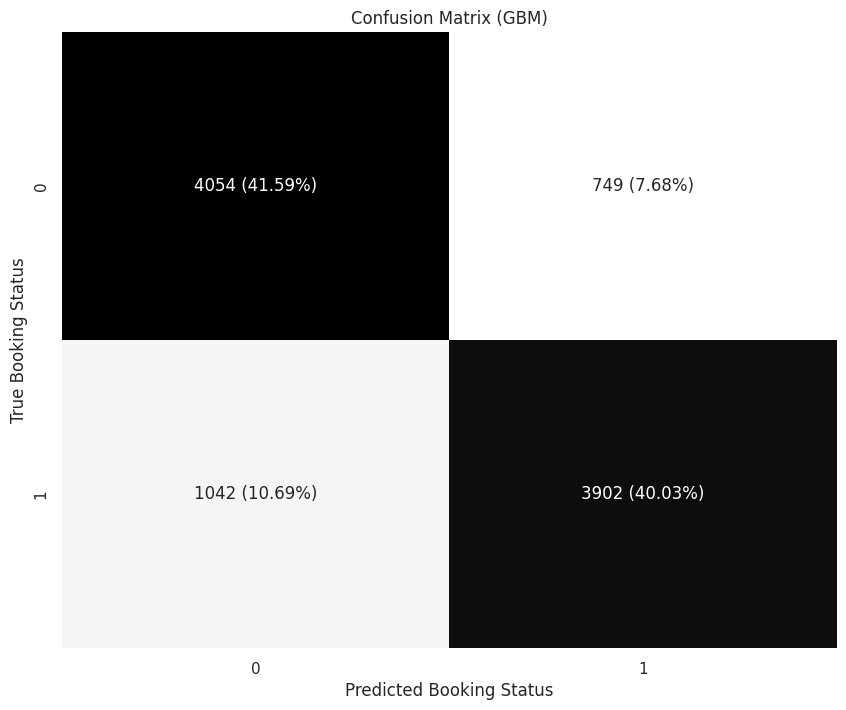

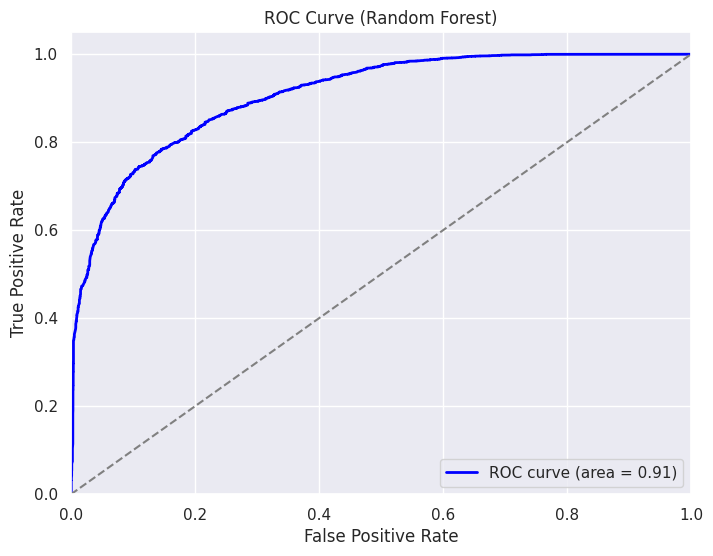

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modell erstellen und trainieren
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# Modell evaluieren
y_pred = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Greys', fmt='', cbar=False)
plt.title('Confusion Matrix (GBM)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_GBM_upsampled.png', bbox_inches='tight')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:, 1])

# Berechnung des ROC-AUC-Werts
roc_auc = roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4881
           1       0.82      0.80      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.86      0.86      0.86      7250
weighted avg       0.88      0.88      0.88      7250



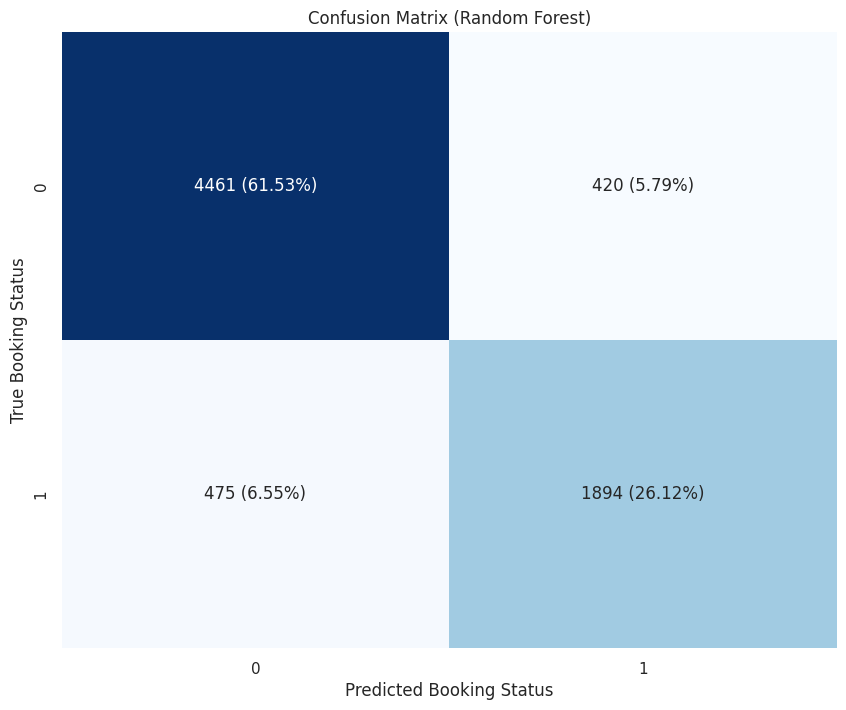

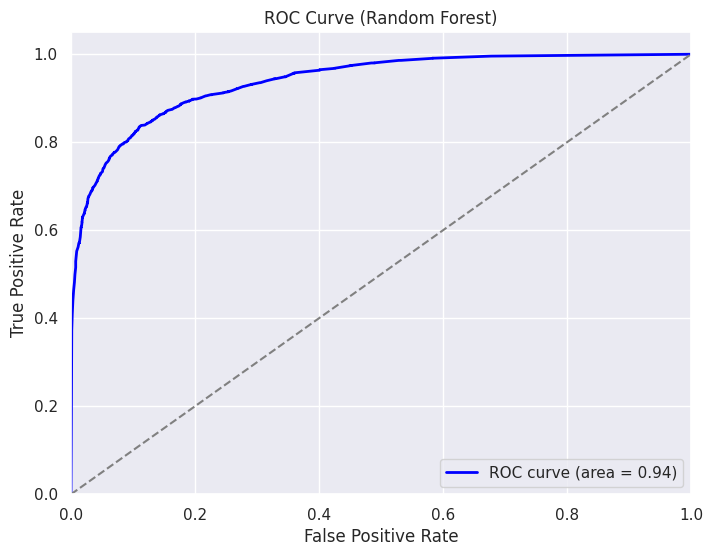

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Initialisierung und Training des Random Forest-Modells
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = rf_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Berechnung des ROC-AUC-Werts
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()